data ready
1825


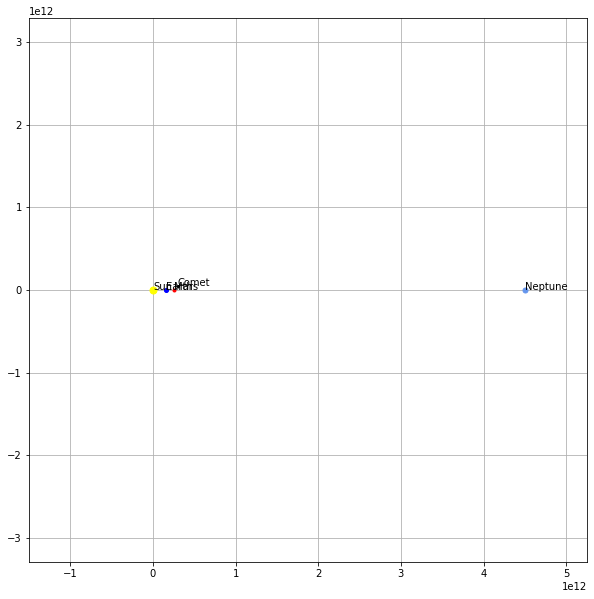

In [17]:
#%% 
G           = 6.67e-11
Mb          = 4.0e30                    # black hole
Ms          = 2.0e30                    # sun
Me          = 5.972e24                  # earth        
Mm          = 6.39e23                   # mars
Mc          = 6.39e20                   # unknown comet
Mn          = 1.024e26                  # neptune
AU          = 1.5e11
daysec      = 24.0*60*60

e_ap_v      = 29290                     # earth velocity at aphelion
m_ap_v      = 21970                     # mars velocity at aphelion
commet_v    = 7000                      # comet velocity at aphelion

n_ap_v      = 4559                      # neptune veloctiy at aphelion

gravconst_e = G*Me*Ms
gravconst_m = G*Mm*Ms
gravconst_c = G*Mc*Ms

gravconst_n = G*Mn*Ms

# setup the starting conditions
# earth
xe, ye ,ze    = 1.0167*AU,0,0
xve, yve, zve = 0,e_ap_v,0

# mars
xm, ym, zm    = 1.666*AU,0,0
xvm, yvm, zvm = 0,m_ap_v,0

# comet
xc, yc, zc    = 2*AU,0.3*AU,0
xvc, yvc, zvc = 0,commet_v,0

# sun
xs, ys, zs    = 0,0,0
xvs, yvs, zvs = 0,0,0

# neptune
xn, yn, zn    = 30*AU,0,0
xvn, yvn, zvn = 0,n_ap_v,0


t           = 0.0
dt          = 1*daysec # every frame move this time

xelist,yelist,zelist = [],[],[]
xslist,yslist,zslist = [],[],[]
xmlist,ymlist,zmlist = [],[],[]
xclist,yclist,zclist = [],[],[]

xnlist,ynlist,znlist = [],[],[]
# start simulation
while t<5*365*daysec:
    ################ earth #############
    # compute G force on earth
    #rx,ry,rz = xs - xe, ys - ye, zs - ze
    rx,ry,rz = xe - xs, ye - ys, ze - zs
    modr3_e = (rx**2+ry**2+rz**2)**1.5
    fx_e = -gravconst_e*rx/modr3_e
    fy_e = -gravconst_e*ry/modr3_e
    fz_e = -gravconst_e*rz/modr3_e
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xve += fx_e*dt/Me
    yve += fy_e*dt/Me
    zve += fz_e*dt/Me
    
    # update position
    xe += xve*dt
    ye += yve*dt 
    ze += zve*dt
    
    # save the position in list
    xelist.append(xe)
    yelist.append(ye)
    zelist.append(ze)
    
    ################ Mars ##############
    # compute G force on mars
    rx_m,ry_m,rz_m = xm - xs, ym - ys, zm - zs
    modr3_m = (rx_m**2+ry_m**2+rz_m**2)**1.5
    fx_m = -gravconst_m*rx_m/modr3_m
    fy_m = -gravconst_m*ry_m/modr3_m
    fz_m = -gravconst_m*rz_m/modr3_m
    
    xvm += fx_m*dt/Mm
    yvm += fy_m*dt/Mm
    zvm += fz_m*dt/Mm
    
    # update position
    xm += xvm*dt
    ym += yvm*dt
    zm += zvm*dt
    
    # add to list
    xmlist.append(xm)
    ymlist.append(ym)
    zmlist.append(zm)
    
    ################ comet ##############
    # compute G force on comet
    rx_c,ry_c,rz_c = xc - xs, yc - ys, zc - zs
    modr3_c = (rx_c**2+ry_c**2+rz_c**2)**1.5
    fx_c = -gravconst_c*rx_c/modr3_c
    fy_c = -gravconst_c*ry_c/modr3_c
    fz_c = -gravconst_c*rz_c/modr3_c
    
    xvc += fx_c*dt/Mc
    yvc += fy_c*dt/Mc
    zvc += fz_c*dt/Mc
    
    # update position
    xc += xvc*dt
    yc += yvc*dt 
    zc += zvc*dt
    
    # add to list
    xclist.append(xc)
    yclist.append(yc)
    zclist.append(zc)
    
    ################ the sun ###########
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvs += -(fx_e+fx_m)*dt/Ms
    yvs += -(fy_e+fy_m)*dt/Ms
    zvs += -(fz_e+fz_m)*dt/Ms
    
    # update position
    xs += xvs*dt
    ys += yvs*dt 
    zs += zvs*dt
    xslist.append(xs)
    yslist.append(ys)
    zslist.append(zs)
    
    ########## Neptune ################
    # compute G force on Neptune
    
    
    rx_n,ry_n,rz_n = xn - xs, yn - ys, zn - zs
    modr3_n = (rx_n**2+ry_n**2+rz_n**2)**1.5
    fx_n = -gravconst_e*rx_n/modr3_n
    fy_n = -gravconst_e*ry_n/modr3_n
    fz_n = -gravconst_e*rz_n/modr3_n
    
     # update quantities how is this calculated?  F = ma -> a = F/m
    xvn += fx_n*dt/Mn
    yvn += fy_n*dt/Mn
    zvn += fz_n*dt/Mn
    
    # update position
    xn += xvn*dt
    yn += yvn*dt 
    zn += zvn*dt
    
    # save the position in list
    xnlist.append(xn)
    ynlist.append(yn)
    znlist.append(zn)
    
    # update dt
    t +=dt

print('data ready')
#print(xalist,yalist)

#%% plot it 
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
#matplotlib.use("TkAgg") # for mac M1
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()

line_e,     = ax.plot([],[],'-g',lw=1)
point_e,    = ax.plot([AU], [0], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue")
text_e      = ax.text(AU,0,'Earth')

line_m,     = ax.plot([],[],'-g',lw=1)
point_m,    = ax.plot([1.666*AU], [0], marker="o", markersize=3, markeredgecolor="red", markerfacecolor="red")
text_m      = ax.text(1.666*AU,0,'Mars')

line_c,     = ax.plot([],[],'-g',lw=1)
point_c,    = ax.plot([2*AU], [0], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_c      = ax.text(2*AU,0,'Comet')

line_n,     = ax.plot([],[],'-g',lw=1)
point_n,    = ax.plot([30*AU], [0], marker="o", markersize=5, markeredgecolor="cornflowerblue", markerfacecolor="cornflowerblue")
text_n      = ax.text(30*AU,0,'Neptune')


point_s,    = ax.plot([0], [0], marker="o", markersize=7, markeredgecolor="yellow", markerfacecolor="yellow")
text_s      = ax.text(0,0,'Sun')

exdata,eydata = [],[]                   # earth track
sxdata,sydata = [],[]                   # sun track
mxdata,mydata = [],[]                   # mars track
cxdata,cydata = [],[]                   # comet track
nxdata,nydata = [],[]                   # neptune track

print(len(xelist))

def update(i):
    exdata.append(xelist[i])
    eydata.append(yelist[i])
    
    mxdata.append(xmlist[i])
    mydata.append(ymlist[i])
    
    cxdata.append(xclist[i])
    cydata.append(yclist[i])
    
    nxdata.append(xnlist[i])
    nydata.append(ynlist[i])
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(xelist[i],yelist[i])
    text_e.set_position((xelist[i],yelist[i]))
    
    line_m.set_data(mxdata,mydata)
    point_m.set_data(xmlist[i],ymlist[i])
    text_m.set_position((xmlist[i],ymlist[i]))
    
    line_c.set_data(cxdata,cydata)
    point_c.set_data(xclist[i],yclist[i])
    text_c.set_position((xclist[i],yclist[i]))
    
    line_n.set_data(nxdata,nydata)
    point_n.set_data(xnlist[i],ynlist[i])
    text_n.set_position((xnlist[i],ynlist[i]))
    
    point_s.set_data(xslist[i],yslist[i])
    text_s.set_position((xslist[i],yslist[i]))
    
    ax.axis('equal')
    ax.set_xlim(-10*AU,35*AU)
    ax.set_ylim(-10*AU,10*AU)
    #print(i)
    return line_e,point_s,point_e,line_m,point_m,text_e,text_m,text_s,line_c,point_c,text_c,line_n,point_n,text_n

anim = animation.FuncAnimation(fig,func=update,frames=len(xelist),interval=1,blit=True)
plt.show()

#%% to show in Jupyter Notebook 
#from IPython.display import HTML
#HTML(anim.to_jshtml())